# Misión
- Utilizar visualizaciones para “contar una historia”. 
- Mostrar qué países tienen una mayor proporción y cómo ha evolucionado en los últimos años. 
- ¿Cómo se comparan las diferentes regiones del mundo? ¿Cómo está la situación en Guatemala, comparada al mundo? ¿Y comparada América Latina
# Teoría:
- Principios del diseño de visualización: simplicidad, claridad, precisión y eficiencia

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
from constants.countries import LATAM_COUNTRIES

data = pd.read_csv("./data/Food Share Emissions.csv")

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_stacked_area_chart(data, year_column, emissions_column, title, xlabel, ylabel, countries = []):
    
    filtered_data = data[data['Entity'].isin(countries)] if countries else data
    data_pivot = filtered_data.pivot(index=year_column, columns='Entity', values=emissions_column)
    
    plt.figure(figsize=(12, 8))
    plt.stackplot(data_pivot.index, data_pivot.fillna(0).T, labels=data_pivot.columns)
    plt.legend(loc='upper left')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

def create_boxplot_and_linegraph(data, country_name, year_column, emissions_column):
    # Filter the data for the selected country
    country_data = data[data['Entity'] == country_name]

    # Start a subplot of 2 rows and 1 column
    fig, axes = plt.subplots(2, 1, figsize=(12, 12))
    
    # Box plot
    sns.boxplot(x=year_column, y=emissions_column, data=country_data, ax=axes[0])
    axes[0].set_title(f'Box Plot of Emissions for {country_name}')
    axes[0].set_xlabel('Year')
    axes[0].set_ylabel(emissions_column)
    axes[0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability
    
    # Line graph
    sns.lineplot(x=year_column, y=emissions_column, data=country_data, ax=axes[1], marker='o')
    axes[1].set_title(f'Line Graph of Emissions for {country_name}')
    axes[1].set_xlabel('Year')
    axes[1].set_ylabel(emissions_column)
    axes[1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

    plt.tight_layout()
    plt.show()
    


In [7]:
countries = list[data["Entity"].unique()]
print(countries)



list[array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cuba', 'Cyprus', 'Czechia',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia',
       'Falkland Islands', 'Faroe Islands', 'Fiji', 'Finland', '

31


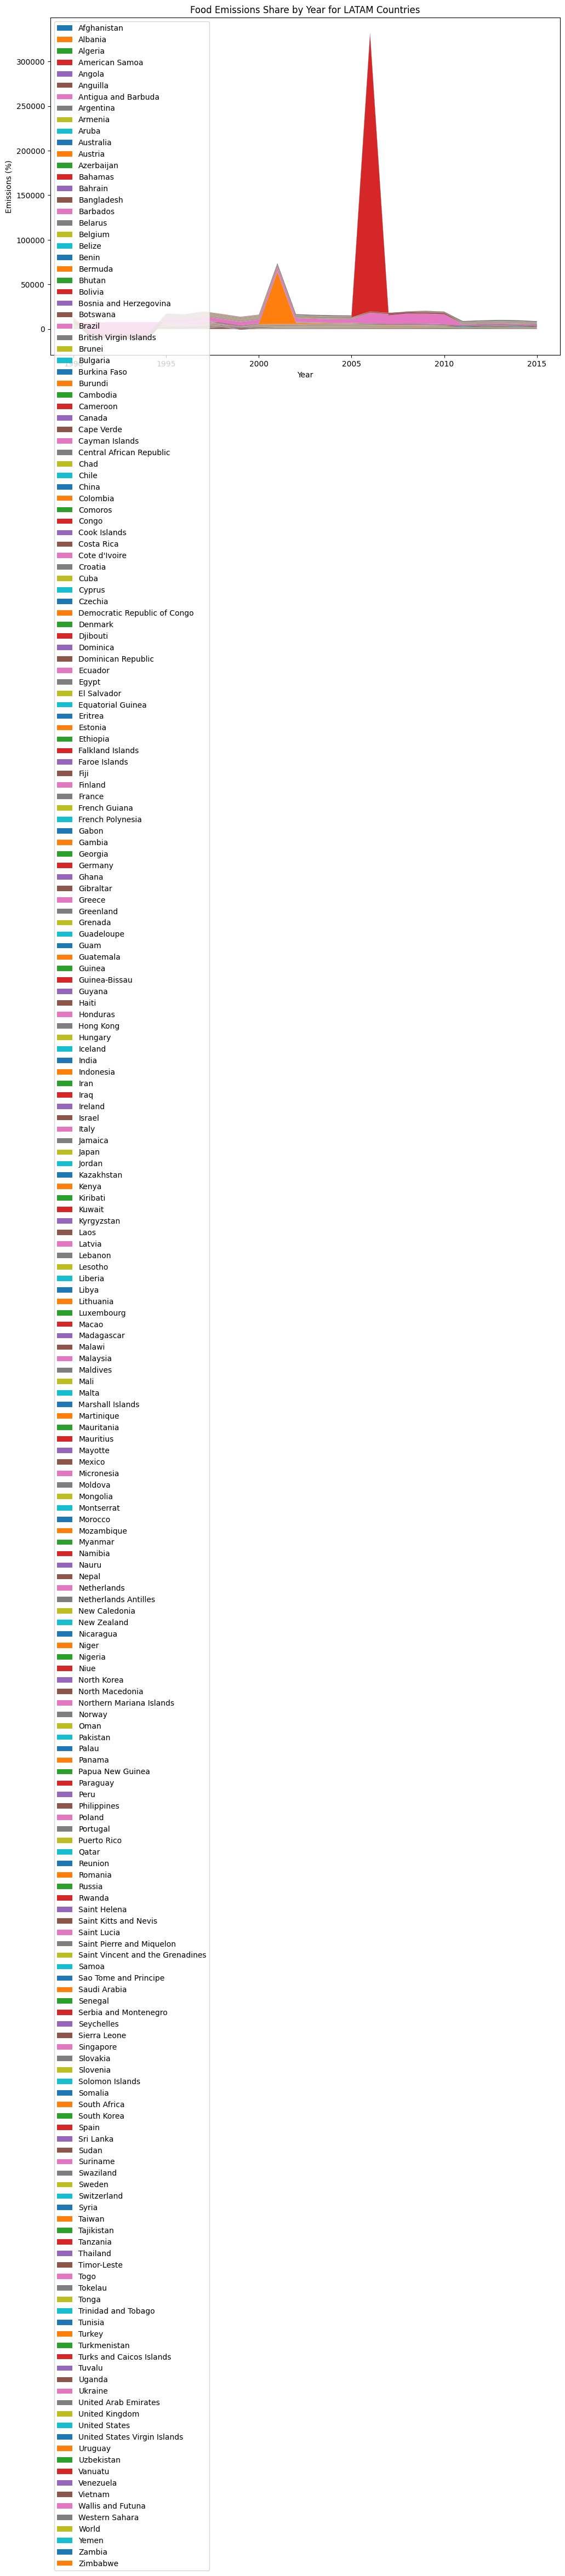

In [ ]:
countries = data["Entity"].unique()
latam_data = data[data['Entity'].isin(LATAM_COUNTRIES)]

print(len(latam_data["Entity"].unique()))

plot_stacked_area_chart(data, 'Year', "Food's share of total emissions (incl. LULUFC)", 
                         'Food Emissions Share by Year for LATAM Countries', 'Year', 'Emissions (%)', LATAM_COUNTRIES)
